<a href="https://colab.research.google.com/github/ThisIsJorgeLima/DS-Unit-1-Sprint-2-Statistics/blob/master/JAL_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [12]:
# TODO - your code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2019-11-07 16:23:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-07 16:23:17 (127 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [10]:
import pandas as pd
import numpy as np

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime',
                          'duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df = df.replace({'?':np.NaN, 'n':0, 'y':1})
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [13]:
# Republican Dataframe:

rep = df[df.party == "republican"]
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [15]:
# Democrat Dataframe created:
dem = df[df['party']=='democrat']
print(rep.shape)
dem.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [16]:
contingency_table =  pd.crosstab(df['party'], df['water-project'])
contingency_table

water-project,0.0,1.0
party,,
democrat,119,120
republican,73,75


In [17]:
dem['water-project'].sum()/len(dem)

0.449438202247191

In [0]:
 # Function to calculate Confidence Interval:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

In [19]:
# Turn dataframe into a numpy array


def confidence_interval_dataframe(df):
  
  confidence_intervals = []
    
    # List values by column and not by row
  df = df.values.T
  
  # Remove nan values from columns
  cleaned_df = []
  for col in df:
    cleaned_col = col[~np.isnan(col)]
    
    # Calculate Confidence interval for each issue
    confidence_intervals.append(confidence_interval(cleaned_col))
    
  confidence_intervals = pd.DataFrame(confidence_intervals, 
                                      columns=['mean', 'lower', 'upper'])  
    
  return confidence_intervals

only_votes = dem.drop('party', axis='columns')

confidence_interval_df = confidence_interval_dataframe(only_votes)
confidence_interval_df.head(20)

,mean,lower,upper
0,0.544593,0.604651,0.664710
1,0.438245,0.502092,0.565939
2,0.849944,0.888462,0.926980
3,0.026332,0.054054,0.081776
4,0.164863,0.215686,0.266509
5,0.415392,0.476744,0.538097
6,0.720782,0.772201,0.823620
7,0.783085,0.828897,0.874710
8,0.704394,0.758065,0.811735
9,0.410757,0.471483,0.532208


In [20]:
confidence_interval_df['margin_of_error'] = confidence_interval_df['upper'] - confidence_interval_df['mean']

print(confidence_interval_df.shape)
confidence_interval_df.head()

(16, 4)


,mean,lower,upper,margin_of_error
0,0.544593,0.604651,0.664710,0.120117
1,0.438245,0.502092,0.565939,0.127694
2,0.849944,0.888462,0.926980,0.077036
3,0.026332,0.054054,0.081776,0.055444
4,0.164863,0.215686,0.266509,0.101646


In [21]:
# Water Project with Confidence Interval
from scipy.stats import t

waterproject = dem['water-project'].dropna()
n = len(waterproject)
mean = waterproject.mean()
sample_std = waterproject.std()
std_err = sample_std/n**.5

CI_waterproject = t.interval(.95, n-1, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI_waterproject)

95% Confidence Interval:  (0.43824514095228484, 0.5659389594661252)


In [22]:
confidence_interval(waterproject)

(0.43824514095228484, 0.502092050209205, 0.5659389594661252)

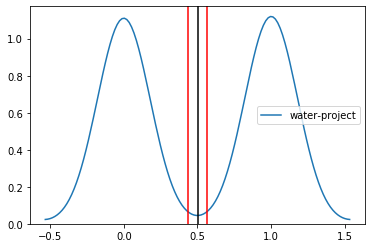

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(waterproject)
plt.axvline(x=CI_waterproject[0], color='red')
plt.axvline(x=CI_waterproject[1], color='red')
plt.axvline(x=mean, color='k');

In [24]:
import numpy as np

waterproject_means = []
for x in range(0,100):
  waterproject = np.random.binomial(n=1, p=.5, size=30)
  waterproject_means.append(waterproject.mean())

print(waterproject_means)

[0.4666666666666667, 0.43333333333333335, 0.5, 0.3, 0.43333333333333335, 0.4, 0.6666666666666666, 0.6666666666666666, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.43333333333333335, 0.6666666666666666, 0.5, 0.6, 0.5333333333333333, 0.43333333333333335, 0.5, 0.4666666666666667, 0.36666666666666664, 0.3, 0.5666666666666667, 0.6333333333333333, 0.6666666666666666, 0.5333333333333333, 0.3333333333333333, 0.5666666666666667, 0.3333333333333333, 0.5, 0.5, 0.36666666666666664, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.4, 0.6333333333333333, 0.4666666666666667, 0.5666666666666667, 0.5, 0.5333333333333333, 0.3333333333333333, 0.6, 0.6666666666666666, 0.43333333333333335, 0.5, 0.3333333333333333, 0.5333333333333333, 0.36666666666666664, 0.43333333333333335, 0.36666666666666664, 0.6, 0.4666666666666667, 0.3333333333333333, 0.6333333333333333, 0.4, 0.6333333333333333, 0.4666666666666667, 0.5, 0.3333333333333333, 0.4666666666666667, 0.3, 0.5, 0.46666666666666

In [25]:
# Sample Size
n = len(waterproject_means)
print(n)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(waterproject_means)
# Sample Standard Deviation
sample_std = np.std(waterproject_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

100
95% Confidence Interval:  (0.46847761110652, 0.5068557222268133)


In [26]:
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.46847761110652, 0.5068557222268133)


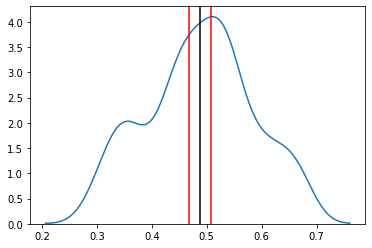

In [27]:
sns.kdeplot(waterproject_means)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=mean, color='k');

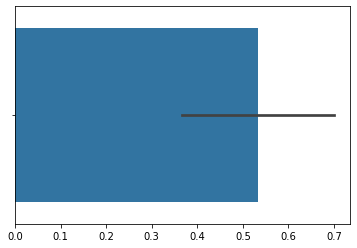

In [28]:
sns.barplot(waterproject)
plt.show()

**Chi-^2 tests:**	
4.	Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data

*   By hand using Numpy
*   In a single line using Scipy



In [29]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-07 16:24:22--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  21.67M   392KB/s    in 57s     

2019-11-07 16:25:20 (389 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22727580]



In [30]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [31]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,883.38,277.40,0.0,0.0,0.0,Sep-2019,

In [32]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [33]:
df.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
hardship_flag                                      0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [34]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,123934.000000,1.284120e+05,108138.000000,128412.000000,128412.000000,128412.000000,128375.000000,1.284120e+05,128412.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,128412.000000,126821.000000,25169.000000,112365.000000,36782.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,96.0,96.000000,96.0,96.000000,92.000000,96.000000,96.000000,215.000000,215.000000,215.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.251300,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,10940.592905,10938.909366,6162.490382,6161.159268,4675.795415,1477.089582,0.656695,8.948688,1.610764,1911.311914,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,20.201519,3.627228e+04,68.211757,1.195901,2.540783,6062.072275,54.298812,3.938218e+04,1.114561,1.519928,...,173.063623,15.431634,8.635400,1.323155,26.013957,40.415233,7.552832,37.817275,0.461553,3.659876,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,3.0,208.562917,3.0,14.885417,625.865870,15299.632396,238.956042,7112.621209,51.513349,18.669767
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.720179,1.082985e+05,NaN,NaN,20.143542,0.733793,0.734480,21.813805,

In [35]:
df1 = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62

In [36]:
df1['int_rate'][:10].iloc[0]

' 14.47%'

In [0]:
int_rate = ' 14.47%'

In [38]:
# .strip() removes characters that exist at the beginning or end of a string
int_rate.replace('%', '')

' 14.47'

In [39]:
float ("4.58")

4.58

In [40]:
type(float("4.58"))

float

In [41]:
def int_rate_to_float(int_rate_string):
  return float(int_rate_string.strip().strip("%"))

int_rate_to_float(int_rate)

14.47

In [42]:
df1['int_rate'].apply(int_rate_to_float)

0         14.47
1         22.35
2         23.40
3         18.94
4         10.72
          ...  
128407    15.02
128408    15.02
128409    13.56
128410    11.06
128411    16.91
Name: int_rate, Length: 128412, dtype: float64

In [43]:
df1['int_rate'] = df1['int_rate'].apply(int_rate_to_float)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,35000,35000,35000.0,36 months,14.47,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,5000,5000.0,36 months,22.35,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,60 months,23.40,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,17100,17100,17100.0,36 months,18.94,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,4000,4000.0,36 months,10.72,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160

In [44]:
# These next steps I'll be defining the function to remove 'months'
df['term'][:10].iloc[0]

' 36 months'

In [0]:
term = ' 36 months'

In [46]:
# removing whitespace by using .strip()
term.strip('months')

' 36 '

In [47]:
type(term.strip().strip('months'))

str

In [0]:
def str_months_to_int(term_str_to_int):
  return int(term_str_to_int.strip().strip('months').strip())

In [0]:
#Function is being applied to the term column
df.term = df['term'].apply(str_months_to_int)

In [51]:
# I NEED CATEGORICAL VARIABLES TO DO A CHI^2 TEST
# use cut points for int_rates 
cut_points = [0, 3, 6, 12, 36, 60, 1000]
label_names = ['0-12', '13-24', '25-30', '31-40','41-50','51-60']
df1['int_rate'] = pd.cut(df['term'], cut_points, labels=label_names)

df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,35000,35000,35000.0,36 months,31-40,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,5000,5000.0,36 months,31-40,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,60 months,41-50,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,17100,17100,17100.0,36 months,31-40,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,4000,4000.0,36 months,31-40,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160

In [52]:
df['term'].unique()

array([36, 60])

In [59]:
# Lets look at the max and min of int_rate column,
# to figure what numbers will use as our cut points. 
df1[df1['int_rate']==df1['int_rate'].max()]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2,10000,10000,10000.0,60 months,41-50,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
8,22000,22000,22000.0,60 months,41-50,487.16,B,B4,Corporate Communications Strategist,10+ years,MORTGAGE,155000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,462xx,IN,28.56,0,Sep-1984,0,NaN,NaN,15,0,23390,44.7%,33,w,19464.45,19464.45,4362.810000,4362.81,2535.55,1827.26,0.0,0.0,0.0,Sep-2019,487.16,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,10,8,20,4,15,0.0,0,0,1,100.0,33.3,0,0,540220,168877,14800,172175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
11,15400,15400,15400.0,60 months,41-50,362.10,C,C2,DISTRICT SALES MANAGER,3 years,MORTGAGE,110000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,451xx,OH,36.55,2,Sep-1991,0,10.0,NaN,14,0,7336,22.2%,26,w,13733.62,13733.62,3240.330000,3240.33,1666.38,1573.95,0.0,0.0,0.0,Sep-2019,362.10,Oct-2019,Oct-2019,0,40.0,1,Individual,NaN,...,10,5,9,3,14,0.0,0,0,1,80.8,33.3,0,0,654296,144449,20000,177320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
13,32075,32075,32075.0,60 months,41-50,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,28378.26,28378.26,6360.800000,6360.80,3696.74,2664.06,0.0,0.0,0.0,Sep-2019,710.26,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,8,12,14,10,17,0.0,0,0,2,100.0,50.0,0,0,360433,56635,20000,80125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16,10000,10000,10000.0,60 months,41-50,264.50,D,D3,Material Handler,10+ years,MORTGAGE,80000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,648xx,MO,

In [60]:
# lets look at the min
df1[df1['int_rate']==df1['int_rate'].min()]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,35000,35000,35000.0,36 months,31-40,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,5000,5000.0,36 months,31-40,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,17100,17100,17100.0,36 months,31-40,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,4000,4000.0,36 months,31-40,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,883.38,277.40,0.0,0.0,0.0,Sep-2019,130.43,Oct-2019,Oct-2019,1,NaN,1,Individual,NaN,...,6,4,4,4,7,0.0,0,0,0,100.0,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,10475,10475,10475.0,36 months,31-40,344.48,B,B3,Teacher,6 years,RENT,66150.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,786xx,TX,7.40,0,Jun-1991,0,28.0,NaN,10,0,10499,40.2%,17,w,8177.98,8177.98,309

In [61]:
df1['int_rate'].value_counts()

31-40    88179
41-50    40233
51-60        0
25-30        0
13-24        0
0-12         0
Name: int_rate, dtype: int64

In [62]:
df1['term'].value_counts()

 36 months    88179
 60 months    40233
Name: term, dtype: int64

In [65]:
contingency_table = pd.crosstab(df1['int_rate'], df1['term'], margins=True)

contingency_table

term,36 months,60 months,All
int_rate,,,
31-40,88179,0,88179
41-50,0,40233,40233
All,88179,40233,128412


In [66]:
observed = pd.crosstab(df1['int_rate'], df1['term'])

observed

term,36 months,60 months
int_rate,,
31-40,88179,0
41-50,0,40233


In [67]:
from scipy import stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squred: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected:\n", np.array(expected))

Chi-Squred: 128407.35206866296
P-value: 0.0
Degrees of Freedom: 1
Expected:
 [[60551.47525932 27627.52474068]
 [27627.52474068 12605.47525932]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)